In [136]:
## Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder#for train test splitting
from sklearn.model_selection import train_test_split#for decision tree object
from sklearn.tree import DecisionTreeClassifier#for checking testing results
from sklearn.metrics import classification_report, confusion_matrix#for visualizing tree 
from sklearn.tree import plot_tree
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn import tree
import dmba

import random
random.seed(100)

In [143]:
## Importing raw data


pima = pd.read_csv("C:\\Users\\Dell\\Desktop\\Projects\\Raw data\\diabetes2.csv") 
print(pima.head())
print(pima.shape)

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
(768, 9)


In [144]:
## split dataset in features and target variable
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age','Glucose','BloodPressure','DiabetesPedigreeFunction','SkinThickness']
X = pima[feature_cols] # Features
y = pima.Outcome # Target variable

In [145]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # 80% training and 20% test

# Split training dataset into validation set
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2


In [148]:
print(X.shape)
p
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(X_test.shape)

(768, 8)
(614, 8)
(614,)
(154, 8)
(154, 8)


#### Default Decision tree

In [146]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(random_state=100)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6818181818181818


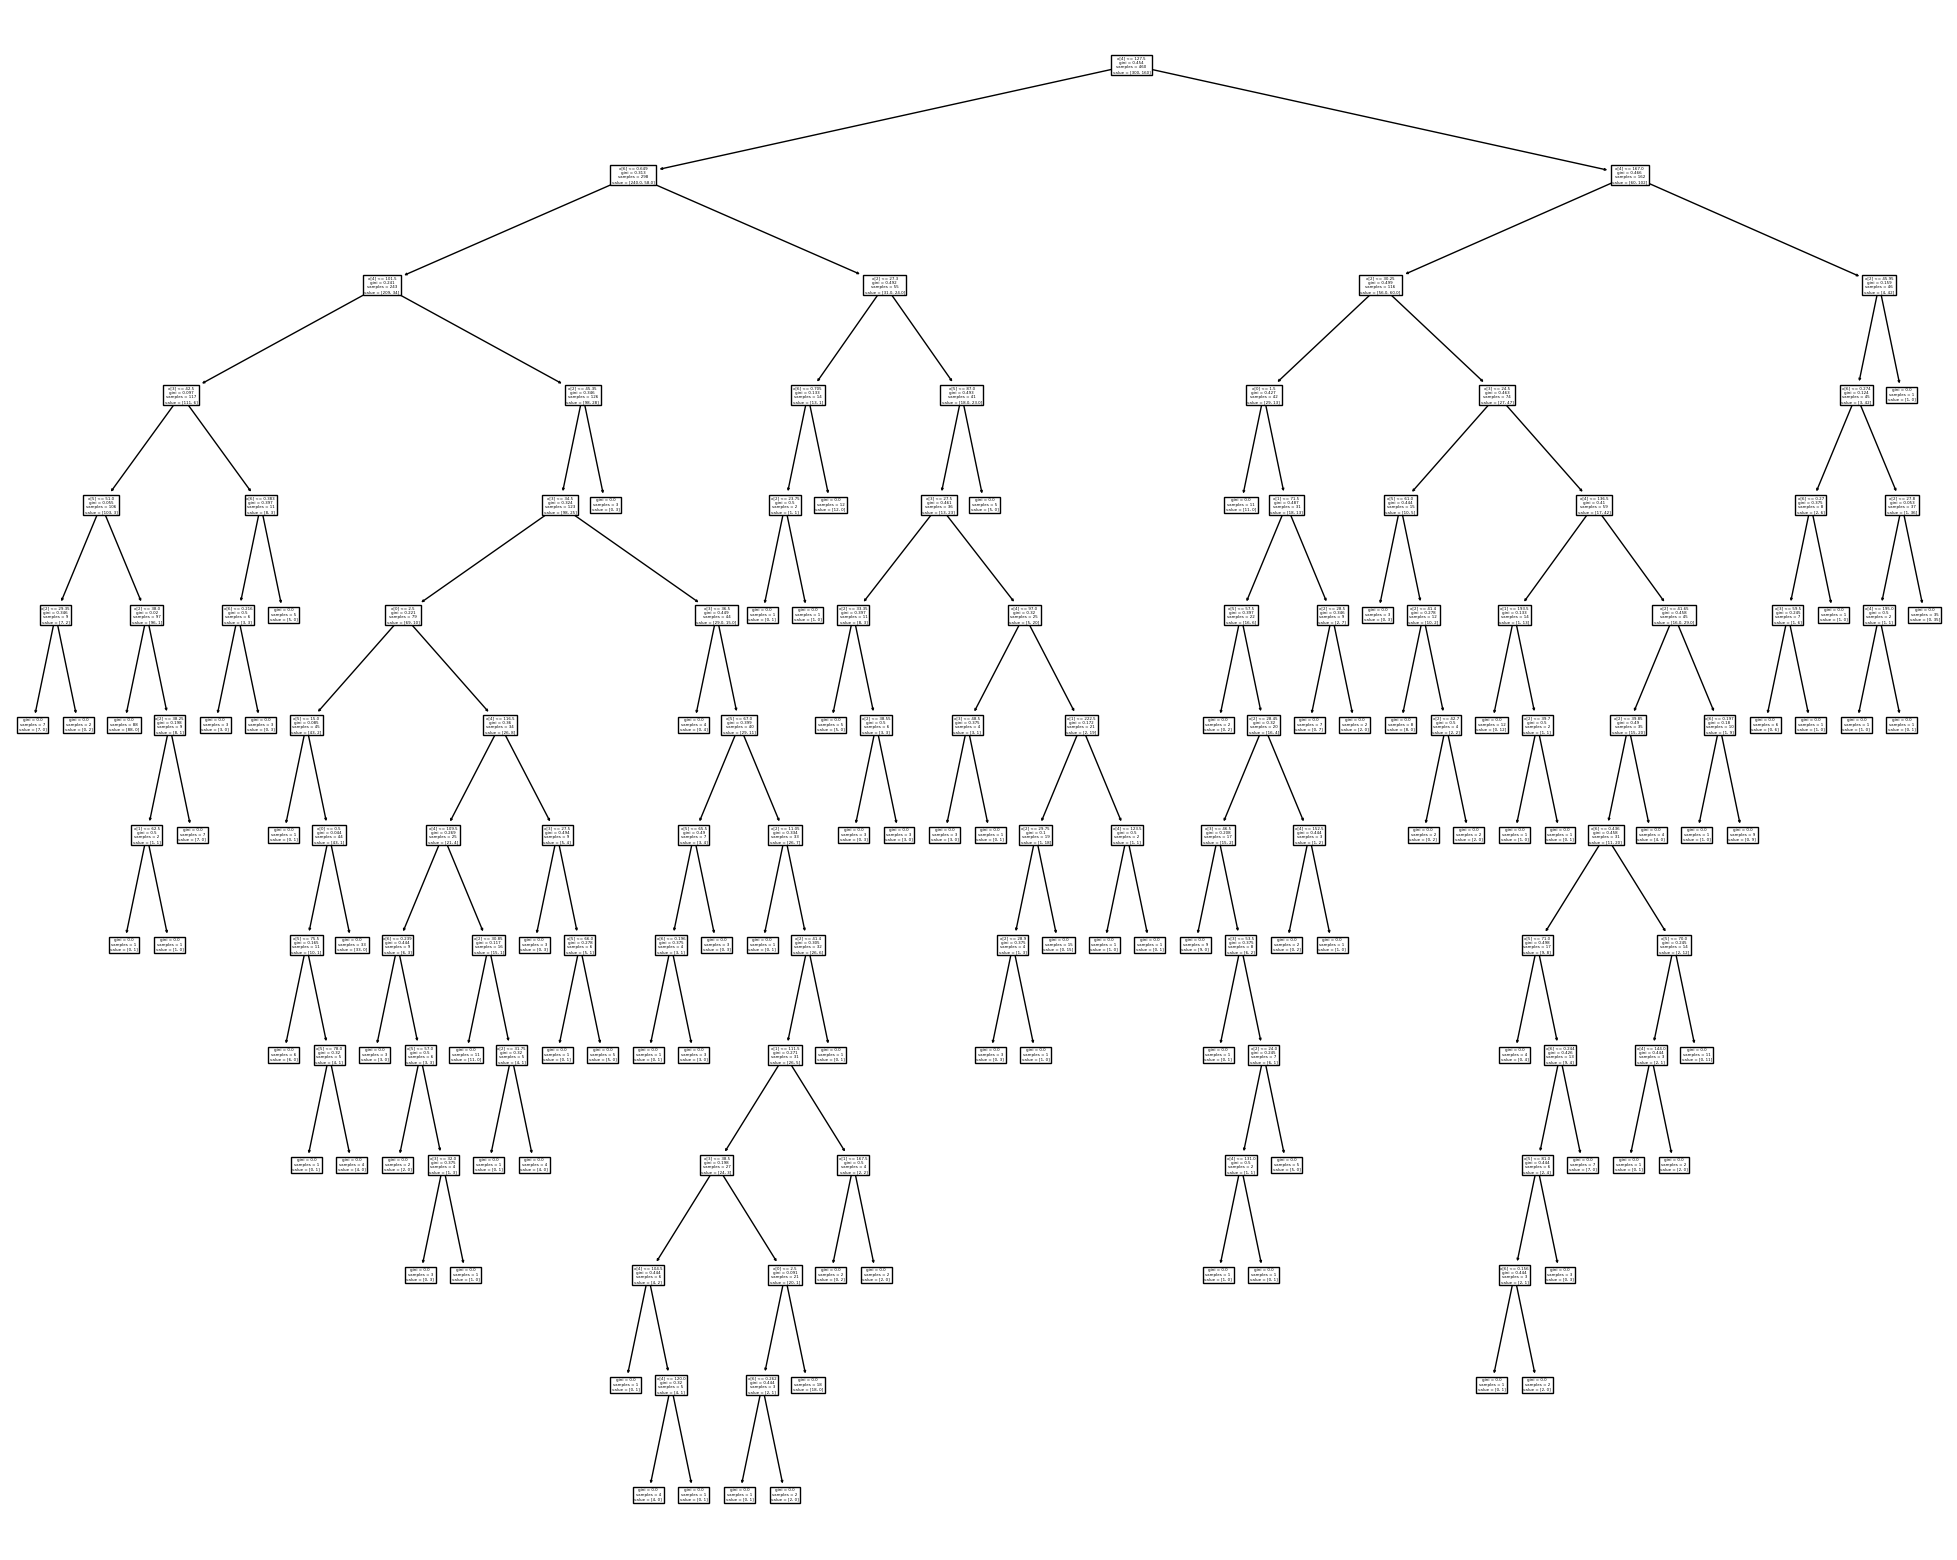

In [69]:
# Plotting decision tree
fig = plt.figure(figsize=(25,20))
tree.plot_tree(clf);
fig.savefig('C:/Users/Dell/Desktop/Projects/Git/Decision-tree/plottreedefault.png')

#### Variable importance plot

In [154]:
#feat_importance = clf.tree_.compute_feature_importances(normalize=False)
#feat_importance = clf.feature_importances_(normalize=False)
feat_importance=pd.DataFrame(clf.feature_importances_)
print("feat importance = " + str(feat_importance))

feat importance =           0
0  0.072591
1  0.022875
2  0.210856
3  0.140910
4  0.288000
5  0.097737
6  0.119713
7  0.047319


<Axes: >

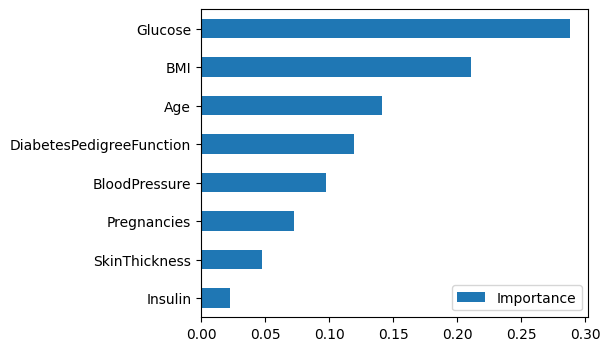

In [159]:
import matplotlib.pyplot as plt

feat_importances = pd.DataFrame(clf.feature_importances_, index=feature_cols, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=True, inplace=True)
feat_importances.plot(kind='barh', figsize=(5,4))

#### Checking whether the model is overfitted or not 

In [88]:
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset

y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_train, y_train_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_test_pred))


Accuracy: 1.0
Accuracy: 0.7077922077922078


#### Decision tree with Entropy

In [107]:
### Creating decision tree using Entropy

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy",random_state=100)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7207792207792207


#### Decision tree with Gini

In [108]:
### Creating decision tree using Gini 

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="gini",random_state=100)

#, max_depth=2

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7077922077922078


#### plotting Training vs. Validation Error  graph

In [102]:
train_preds = clf.predict(X_train) 
print(accuracy_score(y_train,train_preds)) 

val_preds = clf.predict(X_val) 
print(accuracy_score(y_val,val_preds))

1.0
0.7012987012987013


In [103]:
def max_depth_error(max_depths): 
    model = DecisionTreeClassifier(max_depth=max_depths, random_state=42) 
    model.fit(X_train, y_train) 
    training_error = 1 - model.score(X_train, y_train) 
    validation_error = 1 - model.score(X_val, y_val) 
    return {"Max Depth": max_depths, "Training error": training_error, "Validation Error": validation_error} 
  
  
max_depth_Df = pd.DataFrame([max_depth_error(md) for md in range(1, 20)]) 
max_depth_Df 

,Max Depth,Training error,Validation Error
0,1,0.256522,0.285714
1,2,0.256522,0.285714
2,3,0.208696,0.305195
3,4,0.180435,0.292208
4,5,0.147826,0.285714
5,6,0.110870,0.266234
6,7,0.078261,0.266234
7,8,0.056522,0.331169
8,9,0.034783,0.298701
9,10,0.017391,0.318182


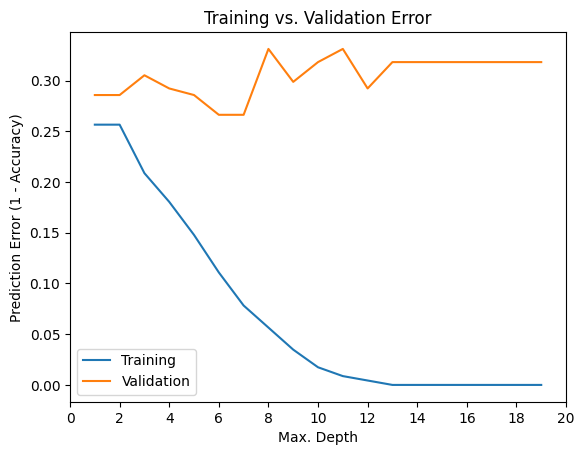

In [52]:
plt.figure() 
plt.plot(max_depth_Df['Max Depth'], max_depth_Df['Training error']) 
plt.plot(max_depth_Df['Max Depth'], max_depth_Df['Validation Error']) 
plt.title('Training vs. Validation Error') 
plt.xticks(range(0,21, 2)) 
plt.xlabel('Max. Depth') 
plt.ylabel('Prediction Error (1 - Accuracy)') 
plt.legend(['Training', 'Validation'])

### Optimal point is the one where training and validation accuracy is almost same.In this case its 2

#### Accuracy after adding max depth in Entropy and Gini index

In [105]:
# Create Decision Tree classifer object using entropy
clf = DecisionTreeClassifier(criterion="entropy",random_state=100,max_depth=2)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7077922077922078


In [106]:
# Create Decision Tree classifer object using GINI
clf = DecisionTreeClassifier(criterion="gini",random_state=100,max_depth=2)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7337662337662337


####  Pruning using cost_complexity_pruning_path

In [170]:
from sklearn.tree import DecisionTreeClassifier
path=clf.cost_complexity_pruning_path(X_train,y_train)
alphas=path['ccp_alphas']

alphas

array([0.        , 0.00130293, 0.00135722, 0.0014806 , 0.00152687,
       0.00155111, 0.00155463, 0.00161564, 0.00173724, 0.00190011,
       0.00194297, 0.00216111, 0.00217155, 0.00217155, 0.00217155,
       0.00217155, 0.00217155, 0.00217155, 0.00217155, 0.00221679,
       0.00233405, 0.00235031, 0.00237281, 0.00241261, 0.002443  ,
       0.002443  , 0.002443  , 0.002443  , 0.00245154, 0.00248177,
       0.00260586, 0.00266509, 0.002792  , 0.0028389 , 0.00286935,
       0.0028954 , 0.00293345, 0.00304017, 0.00316685, 0.00317998,
       0.00332519, 0.00347264, 0.00379035, 0.00427524, 0.00433205,
       0.00448509, 0.00454443, 0.00454842, 0.0046007 , 0.00487375,
       0.00548446, 0.00553495, 0.00574427, 0.00597177, 0.00687962,
       0.0071113 , 0.00738864, 0.00834583, 0.00923453, 0.00991979,
       0.01008115, 0.01619014, 0.01862736, 0.0821149 ])

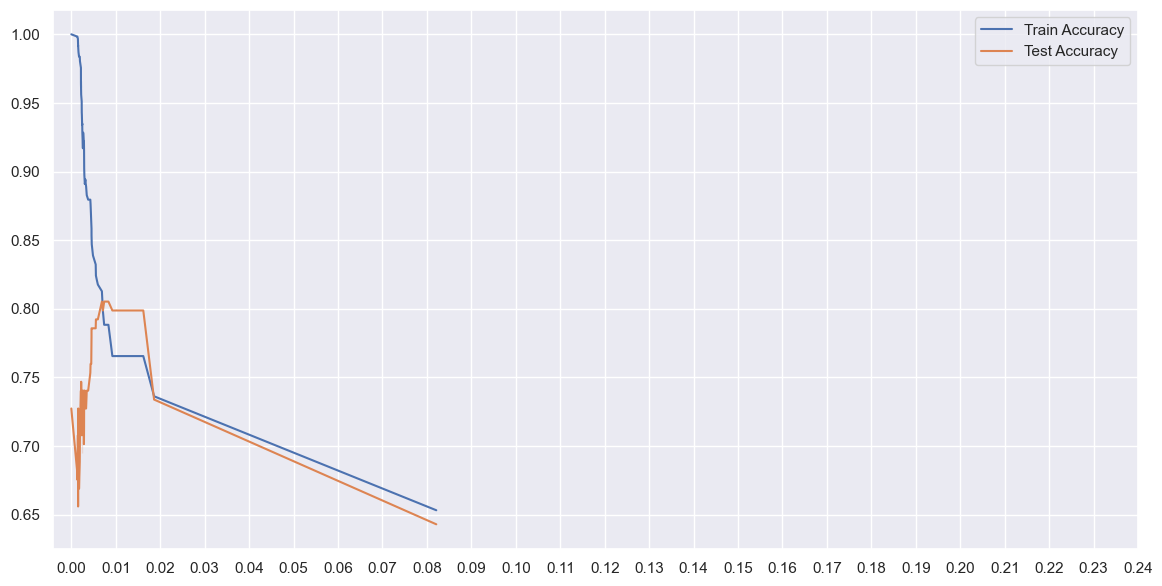

In [171]:
accuracy_train,accuracy_test=[],[]

for i in alphas:
    tree=DecisionTreeClassifier(ccp_alpha=i)
    
    tree.fit(X_train,y_train)
    y_train_pred=tree.predict(X_train)
    y_test_pred=tree.predict(X_test)
    
    accuracy_train.append(accuracy_score(y_train,y_train_pred))
    accuracy_test.append(accuracy_score(y_test,y_test_pred))
    
    
sns.set()
plt.figure(figsize=(14,7))
sns.lineplot(y=accuracy_train,x=alphas,label="Train Accuracy")
sns.lineplot(y=accuracy_test,x=alphas,label="Test Accuracy")
plt.xticks(ticks=np.arange(0.00,0.25,0.01))
plt.show()


In [172]:
# Create Decision Tree classifer object cost_complexity_pruning_path
clf = DecisionTreeClassifier(criterion="gini",random_state=100,ccp_alpha=0.02)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7337662337662337


#### Decision tree model after "GridSearchCV" hypertuning

In [25]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

params = {'criterion': ['gini','entropy'],
          'max_depth': range(1,10),
          'max_leaf_nodes': list(range(2, 10)), 
          'min_samples_split': range(1,5),
          'min_samples_leaf': [1, 2, 3]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)
grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 1728 candidates, totalling 5184 fits


C:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
1296 fits failed out of a total of 5184.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1296 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': range(1, 5)},
             verbose=1)

In [65]:
grid_search_cv.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_leaf_nodes': 7,
 'min_samples_leaf': 3,
 'min_samples_split': 2}

In [113]:
# Create Decision Tree classifer object using GridSearchCV parameters
clf = DecisionTreeClassifier(criterion="gini",random_state=100,max_depth=5,max_leaf_nodes=7,min_samples_leaf=3,min_samples_split=2)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7467532467532467


#### Decision tree model after "RandomizedSearchCV" hypertuning

In [77]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
import time

# setup parameter space
parameters = {'criterion':['gini','entropy'],
              'max_depth': range(1,10),
              'max_leaf_nodes': list(range(2, 10)), 
              'min_samples_split': range(1,5)}
             
# create an instance of the randomized search object
r1 = RandomizedSearchCV(DecisionTreeClassifier(), parameters, cv=5, n_iter=100, random_state=42, n_jobs=-1)

# conduct grid search over the parameter space
start_time = time.time()
r1.fit(X_train,y_train)
duration = time.time() - start_time

# show best parameter configuration found for classifier
cls_params2 = r1.best_params_
cls_params2['min_samples_split'] = np.ceil(cls_params2['min_samples_split']*X_train.shape[0])
cls_params2

C:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
120 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py"

{'min_samples_split': 1840.0,
 'max_leaf_nodes': 2,
 'max_depth': 9,
 'criterion': 'gini'}

In [116]:
# Create Decision Tree classifer object using RandomizedSearchCV
clf = DecisionTreeClassifier(criterion="gini",random_state=100,max_depth=9,max_leaf_nodes=2,min_samples_split=1840)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6428571428571429


#### Decision tree model after "BayesSearchCV" hypertuning¶

In [102]:
###  Bayesian Search
from skopt import BayesSearchCV

# setup parameter space
parameters = {'criterion':['gini','entropy'],
              'max_depth': list(range(2, 10)),
              'max_leaf_nodes': list(range(2, 10)),
              'min_samples_split': list(range(2, 100))}
              
# create an instance of the bayesian search object
b1 = BayesSearchCV(DecisionTreeClassifier(), parameters, cv=5, n_iter=10, random_state=42, n_jobs=-1)

# conduct randomized search over the parameter space
start_time = time.time()
b1.fit(X_train,y_train)
duration = time.time() - start_time

# show best parameter configuration found for classifier
cls_params3 = b1.best_params_
cls_params3['min_samples_split'] = np.ceil(cls_params3['min_samples_split']*X_train.shape[0])
cls_params3

OrderedDict([('criterion', 'gini'),
             ('max_depth', 9),
             ('max_leaf_nodes', 2),
             ('min_samples_split', 20240.0)])

In [117]:
# Create Decision Tree classifer object using BayesSearchCV
clf = DecisionTreeClassifier(criterion="gini",random_state=100,max_depth=9,max_leaf_nodes=2,min_samples_split=20240)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6428571428571429
